In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pybisp as pb
%matplotlib inline

In [2]:
# read in the data file sampled at 1.5 kHz over 20 seconds
datafile='../../data/optical-trap.xlsx'
data = pd.ExcelFile(datafile).parse()
sample_path = data.values

# set some useful parameters
dt = 1.0/1500; t = np.arange(0, data.size*dt, dt)

k_B = 1.38064881313131e-17  # Boltzmann constant(N micron/Kelvin)
T = 300                     # temperature(Kelvin)
# MAP estimate assuming an Ornstein-Uhlenbeck process
ou = pb.ou.Inference(sample_path, dt)
L, D, K = ou.mapEstimate() 
k = K * (k_B*T) # physical value of the stiffness (N /micron)
print 'The best estimate for the stiffness is', k, 'N/muM '

The best estimate for the stiffness is 4.71653700282e-12 N/muM 


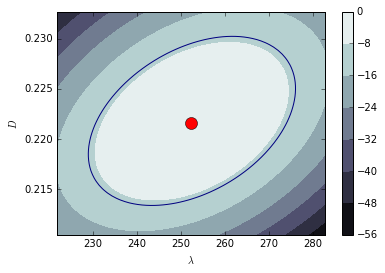

In [3]:
ou.plotLogProb(L, D)